# K-Means Clustering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In a clustering problem, we are given a training set $\{\mathbf{x}^{(1)},\cdots,\mathbf{x}^{(m)}\}$ and $\mathbf{x}^{(i)} \in \mathbb{R}^n$, and we are tasked to find $\{y^{(1)},\cdots,y^{(m)}\}$.  Since **no labels $y^{(i)}$ are given**, this is an **unsupervised** learning problem.  

In layman terms, clustering is simply clustering group of samples into a few cohesive "clusters". Popular application is customer segmentation or image segmentation or for visualization purposes.

We can visualize the algorithm as shown in the following figure.
![](figures/em.png)

## Expectation-Maximization

Here the "E-step" or **Expectation step** is so-named because it involves updating our expectation of which cluster each point belongs to.  The "M-step" or **Maximization step** is so-named because it involves maximizing some fitness function that defines the location of the cluster centers—in this case, that maximization is accomplished by taking a simple mean of the data in each cluster.

## More formal version

The *k*-means clustering algorithm is as follows:

1. Define $k$ (manually)
2. Initialize cluster centroids $\mu^{(1)}, \mu^{(2)}, \cdots, \mu^{(k)} \in \mathbb{R}^n$ randomly
3.
   For each centroid $c = 1, 2, \cdots, k$, calculate the nearest centroid for each sample $i = 1, 2, \cdots, m$ which is based on each feature $j = 1, 2, \cdots, n$:
            
   $$c^{(i)} = \argmin_{c} ||\mathbf{x}^{(i)} - \mu^{(c)}||^2 $$
   
   where
   
   $$||\mathbf{x}^{(i)} - \mu^{(c)}||^2 = \sum\limits_{j=1}^n (\mathbf{x}^{(i)}_j - \mu^{(c)}_{j})^2 $$
   
4. Set the new centroid mean based on each centroid samples:
   
   $$\mu^{(c)} = \frac{\sum\limits_{i=1}^m I\{c^{(i)} = c\}\mathbf{x}^{(i)}}{\sum\limits_{i=1}^m I\{c^{(i)} = c\}}$$
   
5. Repeat 3-4 until either (1) max iterations, (2) samples no longer move to another class.

## Choosing k

To choose $k$, we define "good" clusters as having minimum **within-cluster variation**.  For each $c$, the within-cluster variation ($W(c)$) is simply the sum of squared Euclidean distances between the observations belonging to $c$ and mean across all features.  The formula is as follows:

$$W(c) = \sum\limits_{i \in c}^m \sum\limits_{j=1}^{n} (\mathbf{x}^{(i)}_j - \mu^{(c)}_j)^2$$

Using this equation, we can come up with **total within-cluster variation** ($W(C)$) or sometimes we call **total sum of squares**:

$$W(C) = \sum\limits_{c=1}^{k} \sum\limits_{i \in c}^m \sum\limits_{j=1}^{n} (\mathbf{x}^{(i)}_j - \mu^{(c)}_j)^2$$

We can say that best k should minimize the following objective function:

$$\argmin_{k} W(C) $$

## 1. Scratch

In [ ]:
  rng = np.random.RandomState(42)
  i = rng.permutation(66)[:4]

  i

array([54, 62,  0, 45])

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

X = np.array([[2, 3], [1, 2], [6, 7]]) #close to 1, 0, 2 centers
centers = np.array([[1, 1], [2, 2], [3, 3]])

pairwise_distances_argmin(X, centers)

array([1, 0, 2])

In [1]:
from sklearn.datasets import make_blobs

In [2]:
make_blobs??

Total with variation score:  3349.4613338786116
Total with variation score:  3230.347486876175
Total with variation score:  3186.743520060989
Total with variation score:  3143.4444396576937
Total with variation score:  3087.9589705293247
Total with variation score:  2970.4706272730923
Total with variation score:  2737.813535684265
Total with variation score:  2470.7511099365265
Total with variation score:  2387.4812845588044
Total with variation score:  2143.680449323203
Total with variation score:  1324.5748319321285
Total with variation score:  1025.6220591931638
Total with variation score:  1006.3602710742581
Total with variation score:  1006.3420400278767
Total with variation score:  1006.3420400278767
Done in 14 iterations
Fit and predict time: 0.0688936710357666


Text(0.5, 1.0, 'Final result')

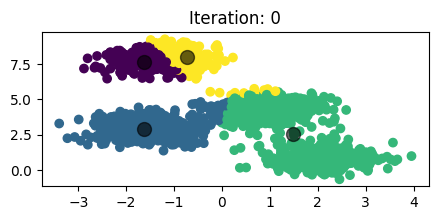

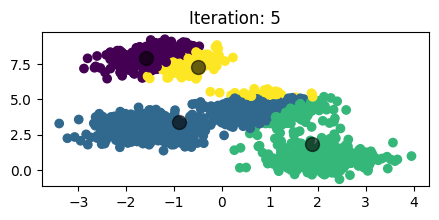

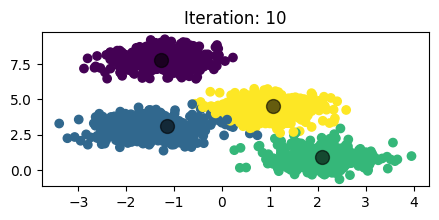

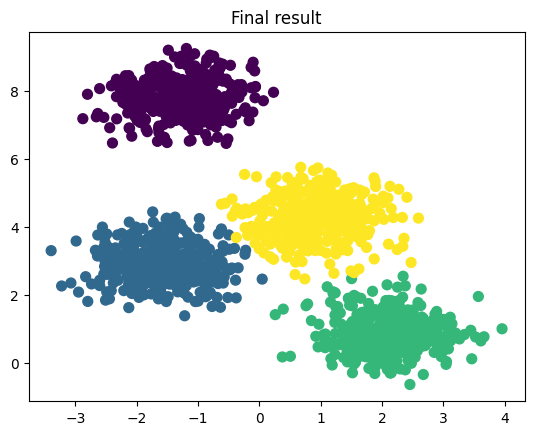

In [ ]:
#Implement K-means from scratch
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
from time import time

X, _ = make_blobs(n_samples=1500, centers=4,
                       cluster_std=0.60, random_state=0)

def kmeans(X, n_clusters):
    m, n = X.shape

    #1. randomly choose n clusters from X
    rng = np.random.RandomState(42)
    i = rng.permutation(m)[:n_clusters]
    centers = X[i]

    iteration = 0

    while True:
        #2. assign lables based on closest center
        #return the index of centers having smallest
        #distance with X
        labels = pairwise_distances_argmin(X, centers)

        #3. find new centers
        new_centers = []
        for i in range(n_clusters):
              new_centers.append(X[labels == i].mean(axis=0))



        #convert list to np.array; you can actually combine #3
        #with np.array in one sentence
        new_centers = np.array(new_centers)

        #compute total within-variation score
        total_with_variation_score = 0
        #labels = pairwise_distances_argmin(X, centers) #<---Note I use X here.  Why?
        for i in range(n_clusters):
            cluster_mean = X[labels==i].mean(axis=0)
            total_with_variation_score += ((X[labels==i] - cluster_mean)** 2).sum()

        print("Total with variation score: ", total_with_variation_score)

        #plotting purpose
        #plot every 5th iteration to save space
        #remove this if, if you want to see each snapshot
        if (iteration % 5 == 0):
            pred = pairwise_distances_argmin(X, new_centers)
            plt.figure(figsize=(5, 2))
            plt.title(f"Iteration: {iteration}")
            plt.scatter(X[:, 0], X[:, 1], c=pred)
            plt.scatter(new_centers[:, 0], new_centers[:, 1], s=100, c="black", alpha=0.6)

        #4 stopping criteria - if centers do not
        #change anymore, we stop!
        if(np.allclose(centers, new_centers)):
            break
        else:
            centers = new_centers
            iteration+=1

    print(f"Done in {iteration} iterations")

def predict(X, centers):
    return pairwise_distances_argmin(X, centers)

start = time()
preds = predict(X, kmeans(X, n_clusters=4))
print(f"Fit and predict time: {time() - start}")
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=preds, s=50)
plt.title("Final result")

## 2. Sklearn

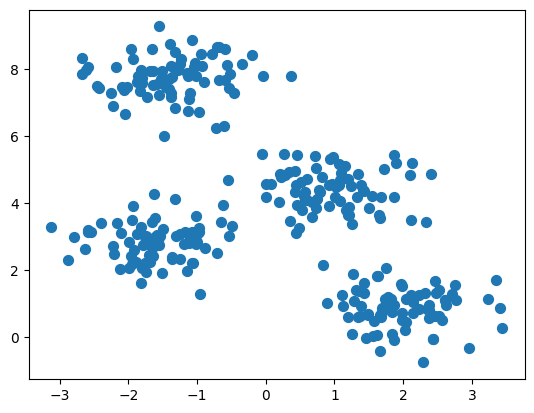

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

#### How to know how many clusters?

Text(5, 600, 'elbow')

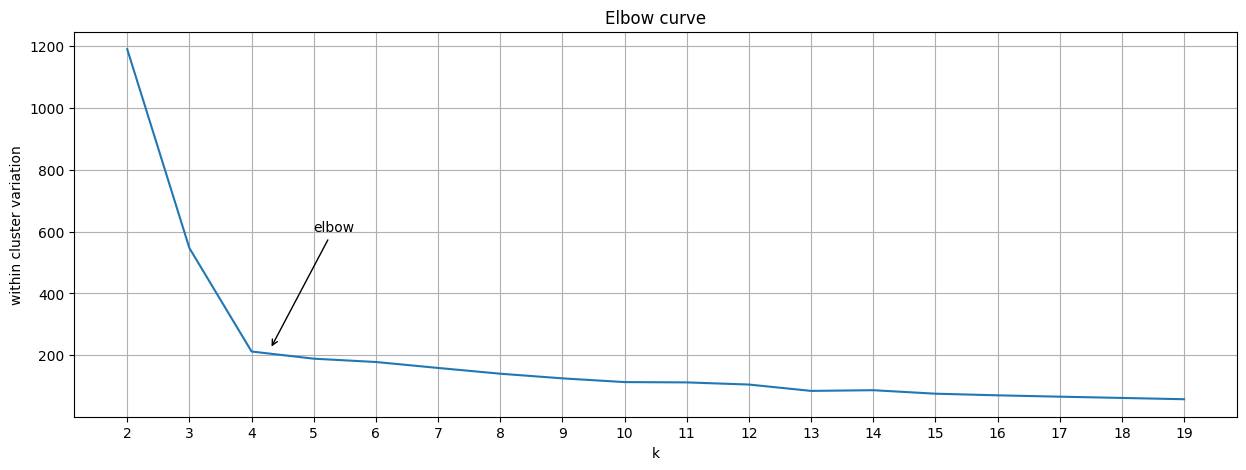

In [ ]:
from sklearn.cluster import KMeans

#sum of squared distances
ssd = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), ssd)
plt.xticks(range(2, 20))
plt.grid(True)
plt.ylabel("within cluster variation")
plt.xlabel("k")
plt.title('Elbow curve')

plt.annotate('elbow', xy=(4.3, 220), xytext=(5, 600),  #xytext ---> xy
            arrowprops=dict(arrowstyle="->"))


pick the point where the drop in inertia becomes less dramatic and the line begins to flatten out.)

Here, 4 is best.  Although 5+ can further minimize $W(C)$, more k leads to more computational resources, thus 4 gives a good balance between performance and efficiency.

## Limitation:  K-means assumes equal-sized spherical distribution


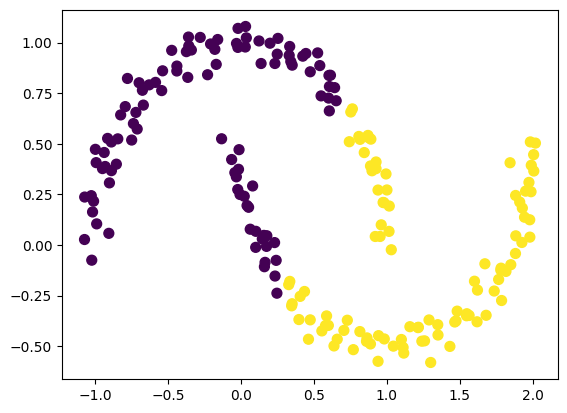

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0, n_init='auto').fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

## Limitation: K-means does not work well with uneven size clusters

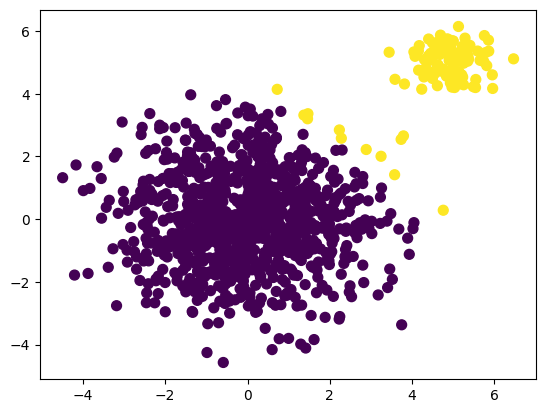

In [ ]:
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [5.0, 5.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)



kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

## Alternatives

When K-means (centroid-based) fail you, you may explore other alternatives:

- **Hierarchical Clustering** (hierachical-based):  This method starts with individual data points as clusters and iteratively merges them into larger clusters until a stopping criterion is met.
- **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** (density-based):
DBSCAN identifies clusters based on the density of data points. It can find clusters of arbitrary shapes and is robust to noise.
- **Gaussian Mixture Models (GMM)** (distribution-based):  GMM models the data as a mixture of Gaussian distributions. It can capture complex cluster shapes and also provides probabilistic cluster assignments.

### When to use K-means

1.  May not guarantee optimal solution.  Depends on initialization.  Can be fix by running k-means many times with different init random values.  Sklearn supports `n_init=auto` which runs k-means with different center seeds and get the best results.

2. Require knowing how many clusters beforehand.  Simple way is to use the elbow method which compute within clusters distances.  In sklearn, this can be easily computed using <code>kmeans inertia_ variable</code>.

3. Assume spherical distribution.  This also means that all k-means assume that clusters have equal number of samples (which may not be true!)

4. Similar to K-nearest neighbors and MDS, k-means can be ridiciously slow for large number of samples.  One way to fix this is using the concept of Mini-Batch.  It is implemented in <code>sklearn.cluster.MiniBatchMeans</code>.  You can also take a look at our `Extended - MiniBatch KMeans.ipynb`